## Project 1 -  Analysis of Bitcoin Market Historical Data

Data Source : https://www.kaggle.com/sudalairajkumar/cryptocurrencypricehistory

### Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
color = sns.color_palette()

%matplotlib inline

### Reading in Bitcoin Dataset

In [2]:
df = pd.read_csv(r'C:\Users\Namratha\Downloads\Bitcoin-Dataset-master\Bitcoin-Dataset-master\bitcoin_dataset.csv', parse_dates=['Date'])
test = pd.read_csv(r'C:\Users\Namratha\Downloads\Bitcoin-Dataset-master\Bitcoin-Dataset-master\test_set.csv', parse_dates=['Date'])

### Data Exploration

In [3]:
df.head(5)

,Date,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
0,2010-02-17,0.0,2043200.0,0.0,0.0,0.0,0.000235,0.0,1.0,0.0,...,31.781022,0.0,241.0,244.0,41240.0,244.0,244.0,65173.13,36500.0,0.0
1,2010-02-18,0.0,2054650.0,0.0,0.0,0.0,0.000241,0.0,1.0,0.0,...,154.463801,0.0,234.0,235.0,41475.0,235.0,235.0,18911.74,7413.0,0.0
2,2010-02-19,0.0,2063600.0,0.0,0.0,0.0,0.000228,0.0,1.0,0.0,...,1278.516635,0.0,185.0,183.0,41658.0,183.0,183.0,9749.98,700.0,0.0
3,2010-02-20,0.0,2074700.0,0.0,0.0,0.0,0.000218,0.0,1.0,0.0,...,22186.687990,0.0,224.0,224.0,41882.0,224.0,224.0,11150.03,50.0,0.0
4,2010-02-21,0.0,2085400.0,0.0,0.0,0.0,0.000234,0.0,1.0,0.0,...,689.179876,0.0,218.0,218.0,42100.0,218.0,218.0,12266.83,1553.0,0.0


In [4]:
df.shape

(2906, 24)

In [5]:
df.columns

Index(['Date', 'btc_market_price', 'btc_total_bitcoins', 'btc_market_cap',
       'btc_trade_volume', 'btc_blocks_size', 'btc_avg_block_size',
       'btc_n_orphaned_blocks', 'btc_n_transactions_per_block',
       'btc_median_confirmation_time', 'btc_hash_rate', 'btc_difficulty',
       'btc_miners_revenue', 'btc_transaction_fees',
       'btc_cost_per_transaction_percent', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions',
       'btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100',
       'btc_output_volume', 'btc_estimated_transaction_volume',
       'btc_estimated_transaction_volume_usd'],
      dtype='object')

In [6]:
df.dtypes

Date                                                   datetime64[ns]
btc_market_price                                              float64
btc_total_bitcoins                                            float64
btc_market_cap                                                float64
btc_trade_volume                                              float64
btc_blocks_size                                               float64
btc_avg_block_size                                            float64
btc_n_orphaned_blocks                                         float64
btc_n_transactions_per_block                                  float64
btc_median_confirmation_time                                  float64
btc_hash_rate                                                 float64
btc_difficulty                                                float64
btc_miners_revenue                                            float64
btc_transaction_fees                                          float64
btc_cost_per_transac

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 24 columns):
Date                                                   2906 non-null datetime64[ns]
btc_market_price                                       2903 non-null float64
btc_total_bitcoins                                     2870 non-null float64
btc_market_cap                                         2899 non-null float64
btc_trade_volume                                       2875 non-null float64
btc_blocks_size                                        2872 non-null float64
btc_avg_block_size                                     2901 non-null float64
btc_n_orphaned_blocks                                  2900 non-null float64
btc_n_transactions_per_block                           2902 non-null float64
btc_median_confirmation_time                           2891 non-null float64
btc_hash_rate                                          2896 non-null float64
btc_difficulty                         

In [8]:
df.describe()

,btc_market_price,btc_total_bitcoins,btc_market_cap,btc_trade_volume,btc_blocks_size,btc_avg_block_size,btc_n_orphaned_blocks,btc_n_transactions_per_block,btc_median_confirmation_time,btc_hash_rate,...,btc_cost_per_transaction_percent,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions,btc_n_transactions_total,btc_n_transactions_excluding_popular,btc_n_transactions_excluding_chains_longer_than_100,btc_output_volume,btc_estimated_transaction_volume,btc_estimated_transaction_volume_usd
count,2903.000000,2.870000e+03,2.899000e+03,2.875000e+03,2872.000000,2901.000000,2900.000000,2902.000000,2891.000000,2.896000e+03,...,2884.000000,2898.000000,2.899000e+03,2896.000000,2.899000e+03,2896.000000,2903.000000,2.898000e+03,2.903000e+03,2.903000e+03
mean,835.633068,1.150861e+07,1.340984e+10,7.415542e+07,35446.344461,0.350432,0.364828,671.163580,7.500961,1.239885e+06,...,67.215351,14.643709,1.940575e+05,101966.977555,6.848288e+07,94527.605663,63123.420255,1.564330e+06,2.036309e+05,2.019018e+08
std,2297.871339,4.201966e+06,3.864239e+10,2.929054e+08,43588.813159,0.353274,0.842967,689.494199,4.977096,2.923568e+06,...,1768.595973,20.555520,2.090391e+05,103840.319030,8.288579e+07,104014.799997,69682.908538,2.280737e+06,2.683944e+05,5.798659e+08
min,0.000000,2.043200e+06,0.000000e+00,0.000000e+00,0.000000,0.000216,0.000000,1.000000,0.000000,2.250000e-05,...,0.136531,0.000000,1.100000e+02,118.000000,4.124000e+04,118.000000,118.000000,6.150000e+03,7.000000e+00,0.000000e+00
25%,6.650305,8.483650e+06,5.363678e+07,2.928597e+05,780.250000,0.024158,0.000000,54.000000,6.050000,1.160115e+01,...,1.184909,4.156470,1.668000e+04,8021.500000,2.425414e+06,6869.000000,6758.500000,4.878713e+05,9.601850e+04,9.569420e+05
50%,235.000000,1.243342e+07,3.346224e+09,1.002135e+07,15132.000000,0.195853,0.000000,375.000000,7.916667,2.142966e+04,...,2.511869,7.814177,1.305860e+05,62268.500000,3.258235e+07,53513.000000,35259.000000,1.104545e+06,1.784544e+05,3.738958e+07
75%,593.635000,1.519732e+07,8.064165e+09,2.832762e+07,58096.500000,0.676204,0.000000,1232.235669,10.216667,1.025112e+06,...,5.916771,14.800589,3.634850e+05,190357.750000,1.080123e+08,186445.750000,113792.500000,2.030429e+06,2.587641e+05,1.309747e+08
max,19498.683330,1.683769e+07,3.270000e+11,5.352016e+09,154444.590300,1.110327,7.000000,2722.625000,47.733333,2.160975e+07,...,88571.428570,161.686071,1.072861e+06,490644.000000,2.966888e+08,470650.000000,318896.000000,4.599222e+07,5.825066e+06,5.760245e+09


A lot of these columns have minimum value of 0 which can indicate either an invalid or missing value.

### Handling Missing data

In [9]:
df.isnull().values.sum()

283

In [10]:
df.isnull().sum()

Date                                                    0
btc_market_price                                        3
btc_total_bitcoins                                     36
btc_market_cap                                          7
btc_trade_volume                                       31
btc_blocks_size                                        34
btc_avg_block_size                                      5
btc_n_orphaned_blocks                                   6
btc_n_transactions_per_block                            4
btc_median_confirmation_time                           15
btc_hash_rate                                          10
btc_difficulty                                         29
btc_miners_revenue                                      6
btc_transaction_fees                                   16
btc_cost_per_transaction_percent                       22
btc_cost_per_transaction                                8
btc_n_unique_addresses                                  7
btc_n_transact

Number of missing values are approximately 10% of the dataset which is not a significant value.

Lets plot a heat map to understand how the missing values are distributed in the dataset.

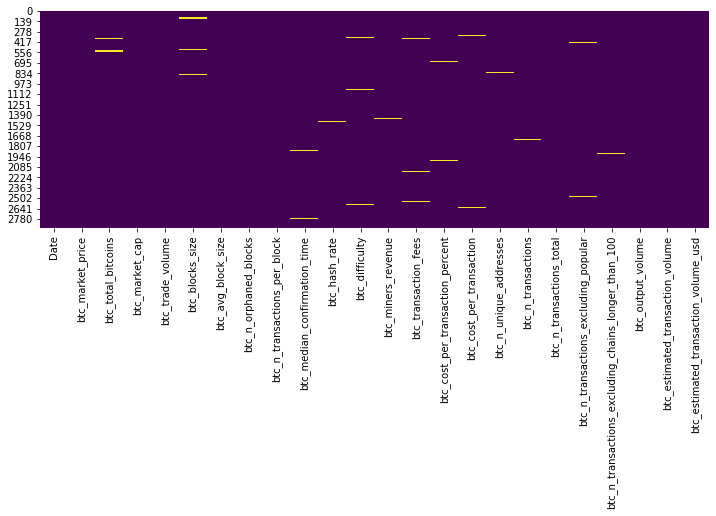

In [11]:
fig, ax = plt.subplots(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

A lot of missing values are observed in the lower half of the dataset and are random.

Let us understand how the columns with missing data.

Text(0.5, 1.0, 'btc_blocks_size')

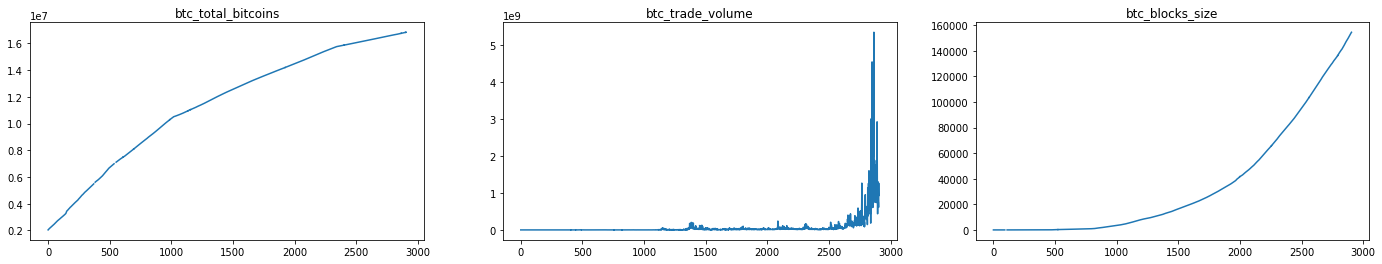

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))

axes[0].plot(df['btc_total_bitcoins'])
axes[0].set_title("btc_total_bitcoins")

axes[1].plot(df['btc_trade_volume'])
axes[1].set_title("btc_trade_volume")

axes[2].plot(df['btc_blocks_size'])
axes[2].set_title("btc_blocks_size")

C:\Users\Namratha\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'btc_transaction_fees')

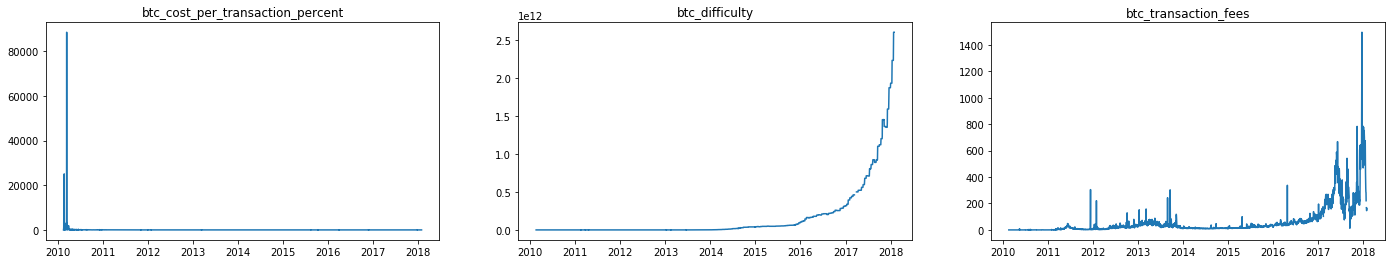

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(24, 4))

axes[0].plot(df['Date'],df['btc_cost_per_transaction_percent'])
axes[0].set_title("btc_cost_per_transaction_percent")

axes[1].plot(df['Date'],df['btc_difficulty'])
axes[1].set_title("btc_difficulty")

axes[2].plot(df['Date'],df['btc_transaction_fees'])
axes[2].set_title("btc_transaction_fees")

Dropping the rows with null values is the best solution.

In [14]:
df.dropna(inplace = True)

#### Trend in  Bitcoin Value

C:\Users\Namratha\Anaconda3\lib\site-packages\seaborn\timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


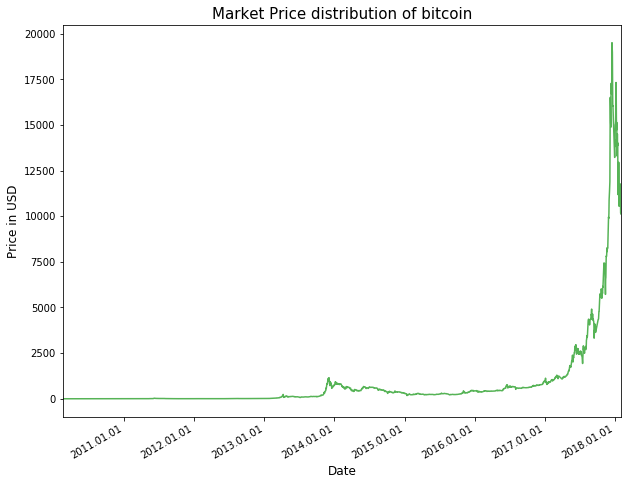

In [15]:
df['Date_mpl'] = df['Date'].apply(lambda x: mdates.date2num(x))

fig, ax = plt.subplots(figsize=(10,8))
sns.tsplot(df.btc_market_price.values, time=df.Date_mpl.values, alpha=0.8, color=color[2], ax=ax)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y.%m.%d'))
fig.autofmt_xdate()
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price in USD', fontsize=12)
plt.title("Market Price distribution of bitcoin", fontsize=15)
plt.show()

As seen in the graph above, value of bitcoin has grown exponentially. 

There was a slight spike in early 2014. However a huge raise was observed in the year 2018 from 1000 USD to more than 17000 USD which later droped to 10000 USD in early 2018.

### Data Leakage

#### Correlation between variables

Dropping unnecessary and duplicate columns:

In [16]:
data = df.copy()

In [17]:
data.drop(['Date','Date_mpl'], axis =1,inplace = True)

In [18]:
data.drop(['btc_blocks_size','btc_n_transactions_total', 'btc_n_transactions_excluding_popular',
       'btc_n_transactions_excluding_chains_longer_than_100'],axis=1, inplace=True)

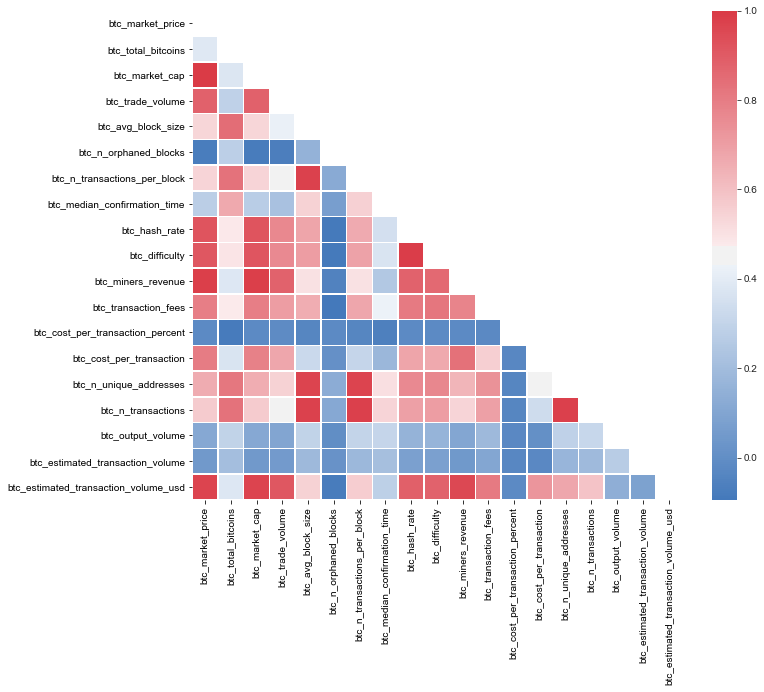

In [19]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 10, as_cmap=True)
with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmax=1, square=True,  cmap=cmap,linewidth=.5)
    plt.show()

#### Correlation of features with target variable 

In [20]:
print(corr["btc_market_price"].sort_values(ascending=False))


btc_market_price                        1.000000
btc_market_cap                          0.999764
btc_miners_revenue                      0.987059
btc_estimated_transaction_volume_usd    0.967160
btc_hash_rate                           0.920458
btc_difficulty                          0.914183
btc_trade_volume                        0.884053
btc_cost_per_transaction                0.799408
btc_transaction_fees                    0.796391
btc_n_unique_addresses                  0.660685
btc_n_transactions                      0.566929
btc_n_transactions_per_block            0.541340
btc_avg_block_size                      0.537546
btc_total_bitcoins                      0.386793
btc_median_confirmation_time            0.276595
btc_output_volume                       0.111754
btc_estimated_transaction_volume        0.047892
btc_cost_per_transaction_percent       -0.013808
btc_n_orphaned_blocks                  -0.072774
Name: btc_market_price, dtype: float64


The features closest related to Bitcoint Market Price are Market Cap, Miner Revenue, Estimated Transaction Volume USD, Hash Rate, Difficulty and Trade Volume with a correlation coefficient greater than 0.85 

Dropping all the features with the correlation coefficient less than 0.5 since they do not make a significant impact on the bitcoin market price

In [21]:
cols_drop = ['btc_total_bitcoins','btc_median_confirmation_time','btc_output_volume','btc_estimated_transaction_volume',
             'btc_cost_per_transaction_percent','btc_n_orphaned_blocks']

data.drop(cols_drop, axis = 1,inplace = True)

One of the assumptions of models like linear regression is that the independent variables are unrelated to each other. 

Hence, finding the correlation of features with each other in the bitcoin dataset

In [22]:
print(corr["btc_market_cap"].sort_values(ascending=False))


btc_market_cap                          1.000000
btc_market_price                        0.999764
btc_miners_revenue                      0.985580
btc_estimated_transaction_volume_usd    0.967405
btc_hash_rate                           0.921778
btc_difficulty                          0.915423
btc_trade_volume                        0.884425
btc_transaction_fees                    0.796852
btc_cost_per_transaction                0.788557
btc_n_unique_addresses                  0.657494
btc_n_transactions                      0.564240
btc_n_transactions_per_block            0.538990
btc_avg_block_size                      0.534879
btc_total_bitcoins                      0.378589
btc_median_confirmation_time            0.273310
btc_output_volume                       0.112406
btc_estimated_transaction_volume        0.048488
btc_cost_per_transaction_percent       -0.013167
btc_n_orphaned_blocks                  -0.077072
Name: btc_market_cap, dtype: float64


Market Cap is higly correlated with features: Miners Revenue, Estimated transcation Volume USD, Hash Rate and Difficulty. Hence we can reatin market cap and drop the rest of the features.

In [23]:
cols_drop = ['btc_market_cap', 'btc_estimated_transaction_volume_usd','btc_hash_rate','btc_difficulty']

data.drop(cols_drop, axis = 1,inplace = True)

In [24]:
data.shape

(2639, 9)

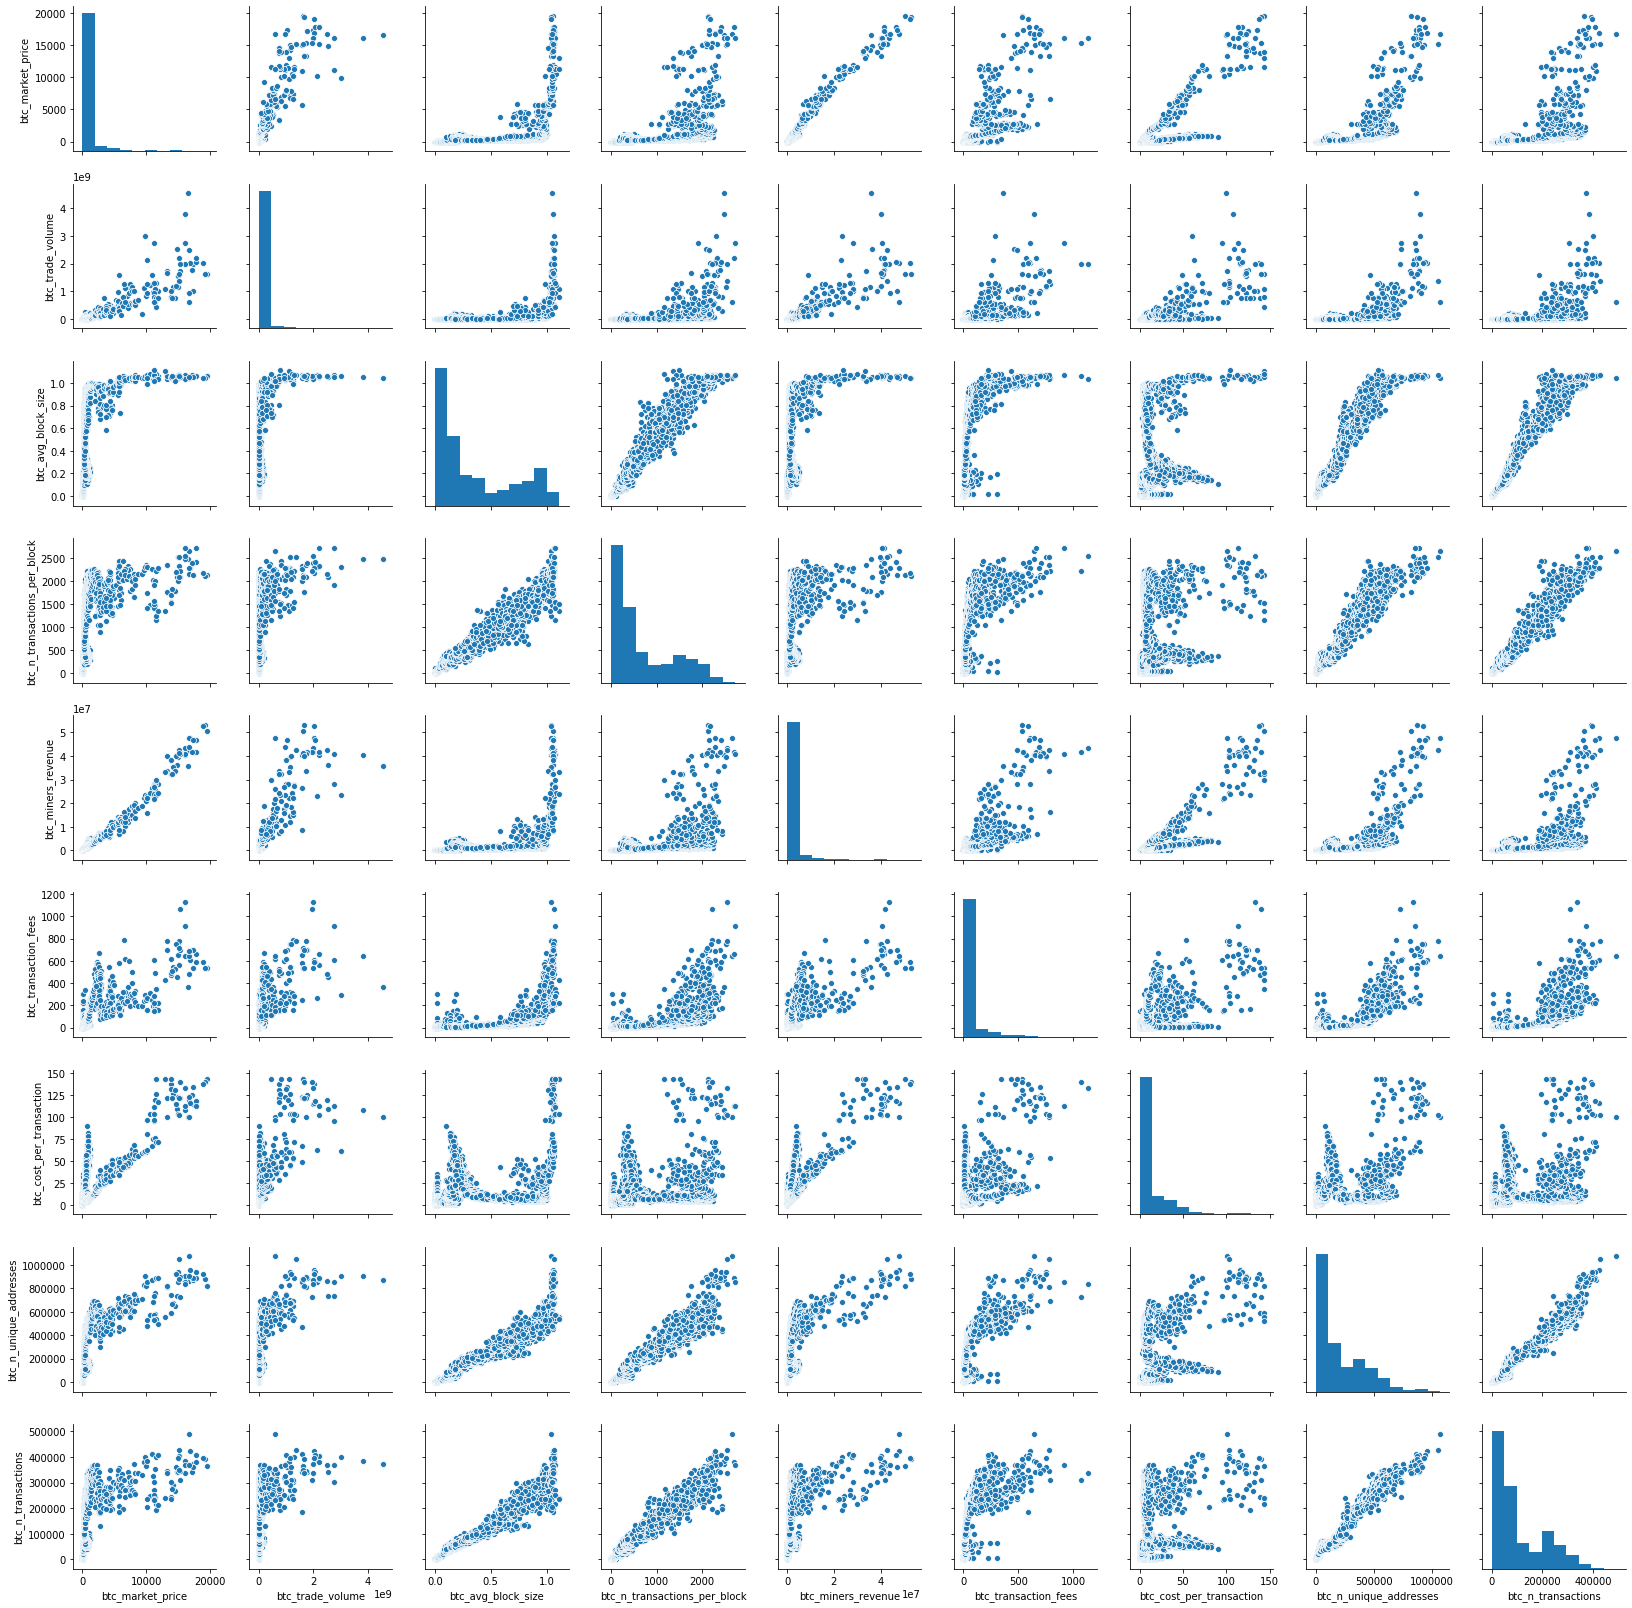

In [25]:
sns.pairplot(data)

From the above plot, we observe that these columns are left skewed. Hence applying log tranformation to all the columns.

In [26]:
logdata = data.copy()

In [27]:
to_log = data.columns
logdata = data[to_log].applymap(lambda x: np.log(x+1))

In [28]:
logdata.head()

,btc_market_price,btc_trade_volume,btc_avg_block_size,btc_n_transactions_per_block,btc_miners_revenue,btc_transaction_fees,btc_cost_per_transaction,btc_n_unique_addresses,btc_n_transactions
0,0.0,0.0,0.000235,0.693147,0.0,0.0,0.0,5.488938,5.501258
1,0.0,0.0,0.000241,0.693147,0.0,0.0,0.0,5.459586,5.463832
2,0.0,0.0,0.000228,0.693147,0.0,0.0,0.0,5.225747,5.214936
3,0.0,0.0,0.000218,0.693147,0.0,0.0,0.0,5.416100,5.416100
4,0.0,0.0,0.000234,0.693147,0.0,0.0,0.0,5.389072,5.389072


### Scaling the data

In [29]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [30]:
y = logdata['btc_market_price']
X = logdata.drop(['btc_market_price'], axis =1)

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state = 20,test_size = 0.2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

### Train the data with cross validation

In [31]:
from sklearn.model_selection import cross_val_score
scores = {}
cv_s= {}

## K-neighbors Regression

### Running the Regressor and Fitting the Model

Text(0, 0.5, 'MSE')

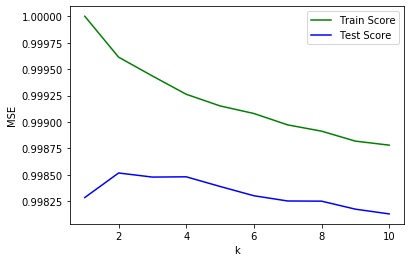

In [32]:
from sklearn.neighbors import KNeighborsRegressor

train_score_array = []
test_score_array = []

for k in range(1,11):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,11)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

Knn Regressor is run with k values ranging from 1 to 10. The MSE obtained for each of these k values is plotted for both training and test set. 

The model looks optimal for k value = 4. Lets further verify this using grid search. 

### Grid Search with Cross Validation

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
knr = KNeighborsRegressor()

param_grid = [{'weights': ['uniform', 'distance'],
                             'n_neighbors': range(1,11)
                             }
                            ]
knn_grid = GridSearchCV(knr, param_grid, cv=5)

The parameters provided for grid search are the type of weights and number of neighbours

In [35]:
# fit the grid with data
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid=[{'n_neighbors': range(1, 11),
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [36]:
knn_grid.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

Running the model again with the best parameters and calculating the average cross validation scores.

In [37]:
knr = KNeighborsRegressor(4)  #  Number of neighbours = 4

cv_scores = cross_val_score(knr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)

print('Average cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation training scores (5-fold): [0.99847054 0.99842407 0.99863741 0.99821175 0.99897282]
Average cross-validation training score (5-fold): 0.999


In [38]:
# Cross validation scores for test data

cv_test_scores = cross_val_score(knr, X_test, y_test,cv = 5)
cv_s['K-neighbors regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

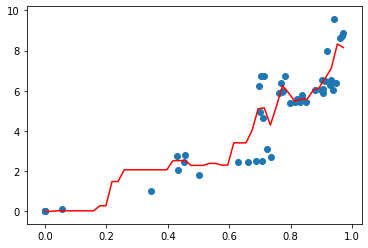

In [39]:
# Plotting the regressor for Bitcoin trade value
X_b = X_train[:50,2].reshape(-1,1)
y_b = y_train[:50]

knn_reg = KNeighborsRegressor(4)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 50).reshape(50, 1)
y_predict = knn_reg.predict(X_new)

plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

## Linear Regression

### Running the regressor and Fitting the Model

In [40]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)

print('Train score: {}'.format(lreg.score(X_train, y_train)))
print('Test score: {}'.format(lreg.score(X_test,y_test)))

scores['LinearRegression']=[lreg.score(X_train, y_train),lreg.score(X_test,y_test)]

Train score: 0.9837528405182699
Test score: 0.9793480539869122


In [41]:
lreg.intercept_

-0.6559161748784348

In [42]:
lreg.coef_

array([-0.14718981,  2.50876881,  2.16165209, -6.94738578, -0.93361389,
        8.14683858, -3.74438038, 10.1090501 ])

In [43]:
logdata.columns

Index(['btc_market_price', 'btc_trade_volume', 'btc_avg_block_size',
       'btc_n_transactions_per_block', 'btc_miners_revenue',
       'btc_transaction_fees', 'btc_cost_per_transaction',
       'btc_n_unique_addresses', 'btc_n_transactions'],
      dtype='object')

### Grid Search with Cross Validation

In [44]:
parameters = {'fit_intercept':('True', 'False'), 'normalize':('True', 'False'), 'copy_X':('True', 'False')}

lreg_grid = GridSearchCV(lreg, parameters, cv=5)

In [45]:
# fit the grid with data
lreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='warn', n_jobs=None,
             param_grid={'copy_X': ('True', 'False'),
                         'fit_intercept': ('True', 'False'),
                         'normalize': ('True', 'False')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [46]:
lreg_grid.best_params_

{'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}

In [47]:
lreg_grid.best_score_

0.9830653723512025

In [48]:
# Cross Validation for training data
cv_scores = cross_val_score(lreg, X_train, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)

print('Average cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation training scores (5-fold): [0.98341252 0.98283715 0.98568493 0.97924058 0.98415086]
Average cross-validation training score (5-fold): 0.983


In [49]:
# Cross validation scores for test data

cv_test_scores = cross_val_score(lreg, X_test, y_test,cv = 5)
cv_s['LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

Text(0.5, 0, 'BTC Trade Value')

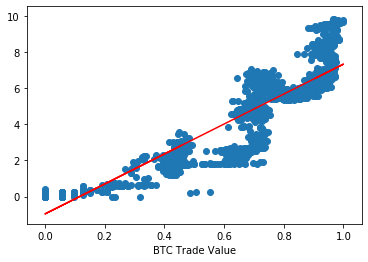

In [50]:
# Plotting the regressor for Bitcoin trade value

%matplotlib inline
import matplotlib.pyplot as plt

X_train_rm = X_train[:,2].reshape(-1,1)
lreg.fit(X_train_rm, y_train)
y_predict = lreg.predict(X_train_rm)

plt.plot(X_train_rm, y_predict, c = 'r')
plt.scatter(X_train_rm,y_train)
plt.xlabel('BTC Trade Value')

## Ridge

### Running the regressor

In [51]:
from sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))
    
print('Train score: {}'.format(train_score_list))
print('Test score: {}'.format(test_score_list))

Train score: [0.9837510098458194, 0.983616497379743, 0.980816550233753, 0.9648275110608547, 0.9216020205849186]
Test score: [0.9795775291986614, 0.9810229548065362, 0.9814932339675966, 0.9657879492401591, 0.9236670673204258]


Text(0.5, 0, '$\\alpha$')

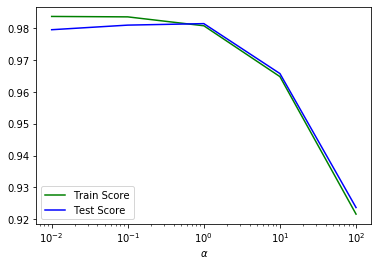

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

### Grid Search with Cross Validation

In [53]:
ridge = Ridge()
param_grid = {'alpha':[0.001,0.01, 0.1,1]}

ridge_grid = GridSearchCV(ridge, param_grid, cv = 5)
ridge_grid.fit(X_train, y_train)

#use gridsearch to get the best parameters, alpha=0.001
print('Best parameters{}'.format(ridge_grid.best_params_))
print('Best score {:.3f}'.format(ridge_grid.best_score_))

Best parameters{'alpha': 0.01}
Best score 0.983


In [54]:
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train, y_train)

scores['Ridge']=[ridge.score(X_train, y_train),ridge.score(X_test,y_test)]

In [55]:
ridge.coef_

array([-0.16502367,  2.50316271,  2.1715584 , -6.9070468 , -0.91335598,
        8.11782974, -3.60609307,  9.95124384])

In [56]:
ridge.intercept_

-0.6569930806382551

In [57]:
# Cross Validation
cv_scores = cross_val_score(ridge, X_train, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)

print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation training scores (5-fold): [0.98339212 0.98281449 0.98566778 0.97937142 0.98415849]
Mean cross-validation training score (5-fold): 0.983


In [58]:
cv_test_scores = cross_val_score(ridge, X_test, y_test,cv = 5)
cv_s['Ridge']=[np.mean(cv_scores),np.mean(cv_test_scores)]

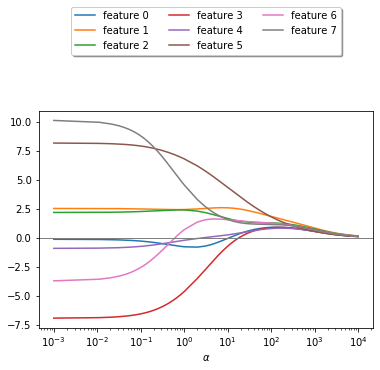

In [59]:
%matplotlib inline
import numpy as np

x_range1 = np.linspace(0.001, 1, 100).reshape(-1,1)
x_range2 = np.linspace(1, 10000, 10000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    coeff.append(ridge.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Lasso

In [60]:
from sklearn.linear_model import Lasso

x_range = [0.001,0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []
f = []
for alpha in x_range: 
    lasso = Lasso(alpha,max_iter = 100000)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))
    f.append(np.sum(lasso.coef_!=0))

print('Train score: {}'.format(train_score_list))
print('Test score: {}'.format( test_score_list))
print('Number of features used: {}'.format(f))

Train score: [0.9825059990353099, 0.9636079377379702, 0.9268696715694699, 0.0, 0.0, 0.0]
Test score: [0.9822337378402509, 0.9630754055708378, 0.9276135730059185, -0.004734193349784865, -0.004734193349784865, -0.004734193349784865]
Number of features used: [7, 4, 3, 0, 0, 0]


Text(0.5, 0, '$\\alpha$')

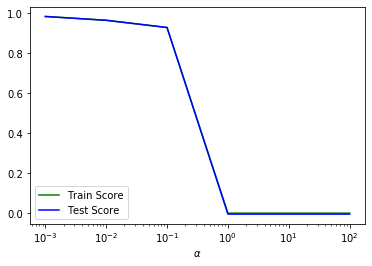

In [61]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

### Grid Search with cross validation

In [62]:
lasso = Lasso(max_iter = 100000)
param_grid = {'alpha':[0.017, 0.02, 0.023, 0.026]}

grid_search = GridSearchCV(lasso, param_grid, cv = 5)
grid_search.fit(X_train, y_train)

print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {}'.format(grid_search.best_score_))

Best parameters{'alpha': 0.017}
Best score 0.9623748113973631


In [63]:
lasso = Lasso(alpha = 0.017,max_iter = 100000)
lasso.fit(X_train, y_train)

scores['Lasso']=[lasso.score(X_train, y_train),lasso.score(X_test,y_test)]

In [64]:
# Cross Validation

cv_scores = cross_val_score(lasso, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)
print('Mean cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation training scores (5-fold): [0.96150487 0.95731021 0.96421066 0.96253271 0.96631768]
Mean cross-validation training score (5-fold): 0.962


In [65]:
cv_test_scores = cross_val_score(lasso, X_test, y_test,cv = 5)
cv_s['Lasso']=[np.mean(cv_scores),np.mean(cv_test_scores)]

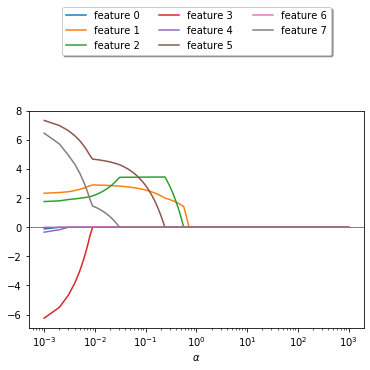

In [66]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,8):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

## Polynomial Regression

### Running the regressor

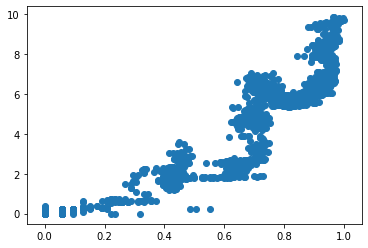

In [67]:
from sklearn.preprocessing import PolynomialFeatures

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)

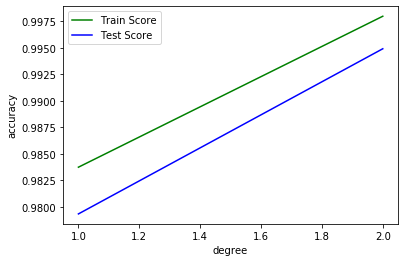

In [68]:
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
%matplotlib inline

x_axis = range(1,3)
plt.plot(x_axis, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

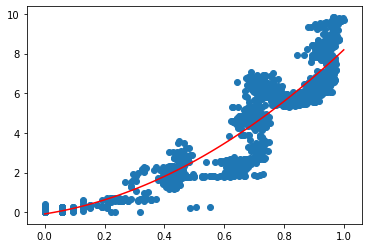

In [69]:
poly = PolynomialFeatures(n)
X_train_poly = poly.fit_transform(X_train_1)
lreg.fit(X_train_poly, y_train)

x_axis = np.linspace(0,1,100).reshape(-1,1)
x_poly = poly.transform(x_axis)
y_predict = lreg.predict(x_poly)

X_train_1 = X_train[:,2].reshape(-1,1)
plt.scatter(X_train_1,y_train)
plt.plot(x_axis, y_predict, c = 'r')

In [71]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
X_train_py, X_test_py, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 20)

linreg = LinearRegression()
linreg.fit(X_train_py, y_train)
print('Polynomial LinearRegression')
print('Train score: {}'.format(linreg.score(X_train_py, y_train)))
print('Test score: {}\n'.format(linreg.score(X_test_py,y_test)))
scores['Polynomial deg 2 LinearRegression']=[linreg.score(X_train_py, y_train),linreg.score(X_test_py,y_test)]

Polynomial LinearRegression
Train score: 0.9979840154917252
Test score: 0.994918398037528



### Grid Search with Cross Validation

In [72]:
param_grid = {'degree': np.arange(10), 'estimator__fit_intercept': [True, False],
              'estimator__normalize': [True, False]}

poly_grid = GridSearchCV(linreg, param_grid, 
                         cv=5, 
                         scoring='neg_mean_squared_error', 
                         verbose=3)

In [73]:
poly_grid.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__copy_X', 'estimator__fit_intercept', 'estimator__n_jobs', 'estimator__normalize', 'estimator', 'iid', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [74]:
# Cross Validation for Training data

cv_scores = cross_val_score(linreg, X_train_py, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)

print('Average cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation training scores (5-fold): [0.9978879  0.9975381  0.99790776 0.99775425 0.99784912]
Average cross-validation training score (5-fold): 0.998


In [75]:
# Cross Validation for Test data

cv_test_scores = cross_val_score(linreg, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 LinearRegression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

## Polynomial Ridge Regression

### Running the Regressor

In [76]:
linridge = Ridge()
linridge.fit(X_train_py, y_train)

print('Train score: {}'.format(linridge.score(X_train_py, y_train)))
print('Test score: {}\n'.format(linridge.score(X_test_py,y_test)))

scores['Polynomial deg 2 Ridge Regression']=[linridge.score(X_train_py, y_train),linridge.score(X_test_py,y_test)]

Train score: 0.9957570870493359
Test score: 0.9944038527184987



### Grid Search with Cross Validation

In [77]:
# Cross Validation for Training Data
cv_scores = cross_val_score(linridge, X_train_py, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)
print('Average cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation training scores (5-fold): [0.99541773 0.99485793 0.99577534 0.99513568 0.99600194]
Average cross-validation training score (5-fold): 0.995


In [78]:
# Cross Validation for Test Data

cv_test_scores = cross_val_score(linridge, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 Ridge Regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

## Polynomial Lasso Regression

### Running the regressor

In [79]:
linlasso = Lasso()
linlasso.fit(X_train_py, y_train)
print('Train score: {}'.format(linlasso.score(X_train_py, y_train)))
print('Test score: {}'.format(linlasso.score(X_test_py,y_test)))

scores['Polynomial deg 2 Lasso Regression']=[linlasso.score(X_train_py, y_train),linlasso.score(X_test_py,y_test)]

Train score: 0.973168310160879
Test score: 0.9740104779329004


### Grid Search with Cross Validation

In [80]:
# Cross validation for Training data

cv_scores = cross_val_score(linlasso, X_train_py, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)

print('Average cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation training scores (5-fold): [0.97179729 0.97005316 0.97404635 0.97399846 0.97471434]
Average cross-validation training score (5-fold): 0.973


In [81]:
# Cross Validation for Test data

cv_test_scores = cross_val_score(linlasso, X_test_py, y_test,cv = 5)
cv_s['Polynomial deg 2 Lasso Regression']=[np.mean(cv_scores),np.mean(cv_test_scores)]

## SVM with Kernel

### Running the Regressor

In [82]:
from sklearn.svm import SVR

svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)

print('Train score: {}'.format(svr.score(X_train, y_train)))
print('Test score: {}\n'.format(svr.score(X_test,y_test)))

scores['SVMK']=[svr.score(X_train, y_train),svr.score(X_test,y_test)]

Train score: 0.9827458392492908
Test score: 0.9824396377269888



In [83]:
parameters = {'kernel': ('linear', 'rbf','poly'), 'C':[1.5, 10],'gamma': [1e-7, 1e-4],'epsilon':[0.1,0.2,0.5,0.3]}
            
svr_grid = GridSearchCV(svr, parameters)

In [84]:
svr_grid.fit(X_train, y_train)

C:\Users\Namratha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated',
                           kernel='linear', max_iter=-1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1.5, 10], 'epsilon': [0.1, 0.2, 0.5, 0.3],
                         'gamma': [1e-07, 0.0001],
                         'kernel': ('linear', 'rbf', 'poly')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [85]:
svr_grid.best_params_

{'C': 10, 'epsilon': 0.2, 'gamma': 1e-07, 'kernel': 'linear'}

In [86]:
# Cross Validation for Training data

cv_scores = cross_val_score(svr, X_train, y_train,cv = 5)

print('Cross-validation training scores (5-fold):', cv_scores)

print('Average cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation training scores (5-fold): [0.98160819 0.98191347 0.98494103 0.97872611 0.98313153]
Average cross-validation training score (5-fold): 0.982


In [87]:
cv_test_scores = cross_val_score(svr, X_test, y_test,cv = 5)
cv_s['SVM']=[np.mean(cv_scores),np.mean(cv_test_scores)]

## SVM without Kernel

### Running the regressor

In [88]:
from sklearn.svm import LinearSVR

lsvr = LinearSVR()
lsvr.fit(X_train, y_train)

print('Train score: {}'.format(lsvr.score(X_train, y_train)))
print('Test score: {}\n'.format(lsvr.score(X_test,y_test)))

scores['SVM without kernel']=[lsvr.score(X_train, y_train),lsvr.score(X_test,y_test)]

Train score: 0.9824547819439282
Test score: 0.9816765209498142



C:\Users\Namratha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [89]:
# Cross Validation for Training data

cv_scores = cross_val_score(lsvr, X_train, y_train,cv = 5)
print('Cross-validation training scores (5-fold):', cv_scores)

print('Average cross-validation training score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation training scores (5-fold): [0.98127993 0.98139782 0.98466235 0.97864998 0.98292918]
Average cross-validation training score (5-fold): 0.982


C:\Users\Namratha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Namratha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Namratha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\Namratha\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [90]:
# Cross Validation for Test data
cv_test_scores = cross_val_score(lsvr, X_test, y_test,cv = 5)
cv_s['SVM without kernel']=[np.mean(cv_scores),np.mean(cv_test_scores)]

## Evaluation of Models

In [91]:
df = pd.DataFrame(scores).T
df.columns = ['Train Score','Test Score']
df = pd.concat([df,pd.DataFrame(cv_s,index = [['Cross_Validation_Train_Score','Cross_Validation_Test_Score']]).T],axis=1, join='inner')

In [92]:
df

,Train Score,Test Score,"(Cross_Validation_Train_Score,)","(Cross_Validation_Test_Score,)"
LinearRegression,0.983753,0.979348,0.983065,0.982243
Ridge,0.983751,0.979578,0.983081,0.982298
Lasso,0.962757,0.962202,0.962375,0.961498
Polynomial deg 2 LinearRegression,0.997984,0.994918,0.997787,0.997427
Polynomial deg 2 Ridge Regression,0.995757,0.994404,0.995438,0.993366
Polynomial deg 2 Lasso Regression,0.973168,0.974010,0.972922,0.973734
SVM without kernel,0.982455,0.981677,0.981784,0.976347


#### Polynomial degree 2 Lasso Regression is the best model for this dataset

### Prediction

In [ ]:
#Compared the cross_val_score,we set my model to PolynomialRegression

poly = PolynomialFeatures(degree=2)
#poly.fit(X)

test_data = test.drop('Date',axis = 1)
test_poly = poly.fit_transform(test_data)

y_pred = linlasso.predict(test_poly)

r=pd.DataFrame()

r['btc_market_price before scale']=y_pred

In [ ]:
poly = PolynomialFeatures(degree=2)

X_poly = poly.fit_transform(X)
X_train_py, X_test_py, y_train, y_test = train_test_split(X_poly, y, test_size = 0.2, random_state = 20)
X_train_py = scaler.fit_transform(X_train_py)
X_test_py = scaler.transform(X_test_py)

linlasso = Lasso()
linlasso.fit(X_train_py, y_train)
print('Polynomial Lasso Regression')
print('Train score: {}'.format(linlasso.score(X_train_py, y_train)))
print('Test score: {}'.format(linlasso.score(X_test_py,y_test)))

In [ ]:
test_data = test.drop('Date',axis = 1)
X_poly = poly.transform(test_data)
test_poly = scaler.transform(X_poly)

r['btc_market_price after scale'] = linlasso.predict(test_poly)